In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sqlite3


In [3]:
ID = input("Enter the ID:  ")
Name = input("Enter the name : ")
Age = input("Enter your Age : ")
Gender = input("Enter your Gender : ")
Criminal = input("Any Criminal Records (Y/N):")

#creating variable for taking no. of photos:
samplenum = 0

#starting the video cam:

cam = cv2.VideoCapture(0)

Enter the ID:  1
Enter the name : 
Enter your Age : 
Enter your Gender : 
Any Criminal Records (Y/N):


In [4]:
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
def update(ID, Name, Age, Gender, Criminal) :
    connection = sqlite3.connect("FaceDatabase.db")
    cmd = "SELECT * FROM People WHERE ID="+str(ID)
    details = connection.execute(cmd)
    recordexist = 0
    for row in details:
        recordexist = 1
    if(recordexist==1):
        cmd = "UPDATE People SET Name="+str(Name)+", Age="+str(Age)+", Gender="+str(Gender)+", CriminalRecords="+str(Criminal)+" WHERE ID=" + str(ID)
    else:
        cmd = "INSERT into People(ID,Name,Age,Gender,CriminalRecords) values (?,?,?,?,?)"
        par = (ID,Name,Age,Gender,Criminal)
        connection.execute(cmd,par)
        connection.commit()
        connection.close()


In [5]:
update(ID,Name,Age,Gender,Criminal)

In [5]:
#cam = cv2.VideoCapture("/home/seshu/chainer-caption/sample_imgs/Ayyappacommunication791.103000.mp4")
while(cam.isOpened()):  # check !
    # capture frame-by-frame
    ret,img = cam.read()

    if ret: # check ! (some webcam's need a "warmup")
        # our operation on frame come here
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray=img
        faces = facedetect.detectMultiScale(gray,1.2,5)
        for(x,y,w,h) in faces :
            samplenum = samplenum+1
            cv2.rectangle(img,(x-200,y-200), (x+w+200, y+h+200),(0,255,0),2)
            cv2.imwrite("face_dataset/User." + str(ID)+ "." +str(samplenum)+".jpg",gray[y-200:y+h+200,x-200:x+w+200])
        cv2.imshow('face',img) # Display the resulting frame
        cv2.waitKey(1)
        if(samplenum>9): #Creating the sample of 20 images which will be stored in face_dataset folder 
            break;
           
# When everything is done release the capture
cam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [7]:
cam.release()
cv2.destroyAllWindows()

### Trainer

In [1]:
import os
import cv2
import numpy as np
from PIL import Image

#creating recognizer using local binary pattern histogram:
#recognizer = cv2.face.LBPHFaceRecognizer_create()
#recognizer = cv2.face.createLBPHFaceRecognizer()

#giving the path of images stored in face_dataset folder:
path = 'face_dataset'

In [2]:
path = 'face_dataset'

#Creating the function to get the image and id of every image and train the model:
def getImageId(path):
    imgpaths = [os.path.join(path,f) for f in os.listdir(path)]
    faces = []
    ids = []
    for imgpath in imgpaths:
        faceimg = Image.open(imgpath).convert('L')
        facenp = np.array(faceimg,'uint8')
        ID = int(os.path.split(imgpath)[-1].split(".")[1])
        faces.append(facenp)
        ids.append(ID)
        cv2.imshow("training",facenp)
        cv2.waitKey(10)
    return np.array(ids) , faces

#using function to get the id and images:
ID , faces = getImageId(path)

In [3]:
print (ID.shape[0])

102


In [2]:
ID=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]

In [3]:
print(len(ID))

4438


In [70]:
ID1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,8]

In [71]:
print(len(ID1))

700


In [3]:
import pandas as pd
ID=pd.DataFrame(ID)
assert(ID.shape==(8004,1))

NameError: name 'ID' is not defined

In [44]:
import pandas as pd
ID=pd.DataFrame(ID)
print (ID.shape)

(700, 1)


In [7]:
print (ID[0].head(n=5))

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64


In [26]:
print(ID[0].shape)

(4438,)


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(ID)
le.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
from keras.utils import np_utils
Y=np_utils.to_categorical(Y,9)

Using TensorFlow backend.


In [25]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc.fit(ID)
Y=enc.transform(ID).toarray()

In [6]:
from PIL import Image
import cv2
import os,sys
path='face_dataset_dev/'
dirs=os.listdir(path)
path_new="/home/xvidia/xvidia/Face_Recognition/train/"
def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im=Image.open(path+item)
            f,e=os.path.splitext(path_new+item)
            imresize=im.resize((96,96),Image.ANTIALIAS)            
            imresize.save(f+'.jpg','JPEG',quality=90)

In [7]:
resize()

In [8]:
import os
import numpy as np
from os import listdir
from os.path import isfile,join
import cv2

my_path="/home/xvidia/xvidia/Face_Recognition/train/"
only_files=[f for f in listdir(my_path) if isfile(join(my_path,f))]
only_files.sort()
images=np.empty(len(only_files),dtype=object)

for n in range(0,len(only_files)):    
    images[n]=cv2.imread(join(my_path,only_files[n]))
    images[n] = cv2.cvtColor(images[n], cv2.COLOR_BGR2GRAY)
    images[n] = cv2.equalizeHist(images[n])

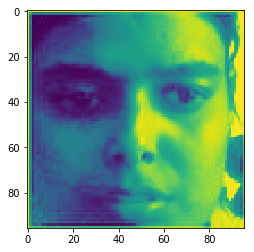

0


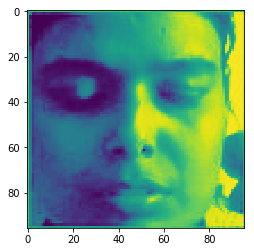

0


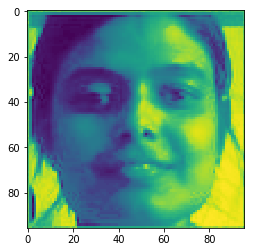

0


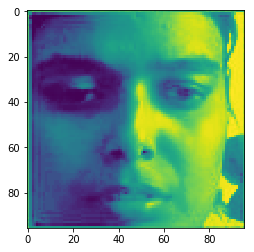

0


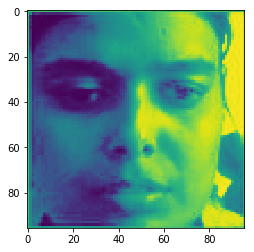

0


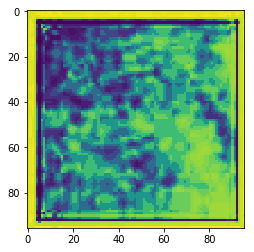

0


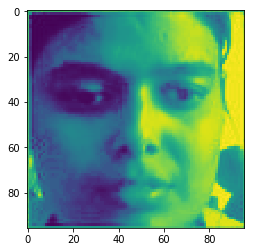

0


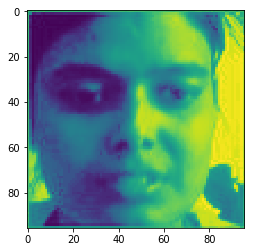

0


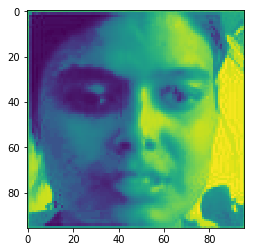

0


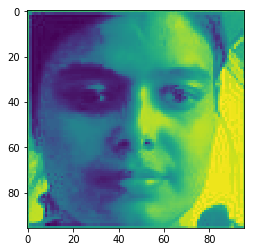

0


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range (0,10):
    fig=plt.figure()
    plt.imshow(images[i])
    plt.show()
    print(Y[i])

In [53]:
print (images.shape)

(700,)


In [54]:
data_size=images.shape[0]
def createsequences():
    dataset=np.ndarray(shape=(images.shape[0],96,96),dtype=np.float32)
    i=0
    while(i<(data_size)):
        temp=np.hstack([images[i]])
        dataset[i,:,:]=temp
        i+=1
    return dataset


In [55]:
dataset_dev=createsequences()

In [56]:
print(dataset_dev.shape)

(700, 96, 96)


In [58]:
dataset_dev=dataset_dev.reshape(dataset_dev.shape[0],96,96,1).astype('float32')

In [79]:
dataset_new=dataset.reshape(dataset.shape[0],12288).astype('float32')

In [19]:
from keras.layers import Input,Dense,Dropout,Flatten
from keras.models import Model
from keras.layers.convolutional import Convolution2D,MaxPooling2D

In [22]:
inputs=Input(shape=(64,64,3))
conv1=Convolution2D(32,5,5,border_mode='same',input_shape=(64,64,3),activation='relu')
conv2=Convolution2D(64,5,5,border_mode='same',activation='relu')
conv3=Convolution2D(128,5,5,border_mode='same',activation='relu')
conv4=Convolution2D(256,5,5,border_mode='same',activation='relu')
conv5=Convolution2D(512,5,5,border_mode='same',activation='relu')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(64, 64, 3...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same", activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), padding="same", activation="relu")`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

In [25]:
x=inputs
x=conv1(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=conv2(x)
x=MaxPooling2D(pool_size=(2,2))(x)
#x=conv3(x)
#x=MaxPooling2D(pool_size=(2,2))(x)
#x=conv4(x)
#x=MaxPooling2D(pool_size=(2,2))(x)
#x=conv5(x)
x=Flatten()(x)
#x=Dense(4450,activation='relu')(x)
#x=Dense(3450,activation='relu')(x)
#x=Dense(2450,activation='relu')(x)
#x=Dense(1450,activation='relu')(x)
#x=Dense(450,activation='relu')(x)
x=Dense(1350,activation='relu')(x)
x=Dense(25,activation='relu')(x)
x=Dense(10,activation='relu')(x)
pred=Dense(1,activation='sigmoid')(x)

In [26]:
model=Model(input=inputs,output=pred)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [27]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [29]:
dataset=dataset/255

In [30]:
model.fit(dataset,Y,epochs=20, batch_size=32)

Epoch 1/20
8004/8004 [==============================] - 380s 48ms/step - loss: 7.9712 - acc: 0.5000
Epoch 2/20
8004/8004 [==============================] - 346s 43ms/step - loss: 7.9712 - acc: 0.5000
Epoch 3/20
 512/8004 [>.............................] - ETA: 5:02 - loss: 8.1892 - acc: 0.4863

KeyboardInterrupt: 

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
inputs=Input(shape=(200,200,3))
x=Flatten()(inputs)
model.add(Dense(1000, input_dim=120000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [42]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

model.fit(dataset,Y, batch_size=2, epochs=10)
score = model.evaluate(dataset,Y, batch_size=2)
print(score)

Epoch 1/10
402/402 [==============================] - 17s 42ms/step - loss: 8.0681 - acc: 0.4975
Epoch 2/10
402/402 [==============================] - 17s 41ms/step - loss: 8.0590 - acc: 0.5000
Epoch 3/10
402/402 [==============================] - 17s 42ms/step - loss: 8.0590 - acc: 0.5000
Epoch 4/10
402/402 [==============================] - 17s 43ms/step - loss: 8.0590 - acc: 0.5000
Epoch 5/10
402/402 [==============================] - 17s 42ms/step - loss: 8.0590 - acc: 0.5000
Epoch 6/10


KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))

model.add(Convolution2D(24, 5, 5, border_mode=”same”, init=’he_normal’, input_shape=(96, 96, 1), dim_ordering=”tf”))
model.add(Activation(“relu”))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode=”valid”))

model.add(Convolution2D(36, 5, 5))
model.add(Activation(“relu”))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode=”valid”))

model.add(Convolution2D(48, 5, 5))
model.add(Activation(“relu”))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode=”valid”))

model.add(Convolution2D(64, 3, 3))
model.add(Activation(“relu”))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode=”valid”))

model.add(Convolution2D(64, 3, 3))
model.add(Activation(“relu”))

model.add(GlobalAveragePooling2D());

model.add(Dense(500, activation=”relu”))
model.add(Dense(90, activation=”relu”))
model.add(Dense(30))

In [ ]:
model.compile(optimizer=’rmsprop’, loss=’mse’, metrics=[‘accuracy’])

checkpointer = ModelCheckpoint(filepath=’face_model.h5', verbose=1, save_best_only=True)

epochs = 30

hist = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

In [43]:
model.fit(dataset,Y,epochs=20, batch_size=2)

ValueError: Error when checking target: expected dense_29 to have 4 dimensions, but got array with shape (402, 1)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,Dropout
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D

model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))

model.add(Convolution2D(24,5,5, border_mode='same', init='he_normal', input_shape=(96, 96, 1), dim_ordering='tf'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(36, 5, 5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(48, 5, 5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D());

model.add(Dense(1500, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(190, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(90, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), kernel_initializer="he_normal", data_format="channels_last", input_shape=(96, 96, 1..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="valid", strides=(2, 2), pool_size=(2, 2))`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5))`
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="valid", strides=(2, 2), pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

In [79]:

from keras.callbacks import ModelCheckpoint
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='CNN_model.h5', verbose=1, save_best_only=True)

epochs = 10
#model.fit(dataset, target)#, validation_split=0.1, shuffle=True, epochs=epochs, batch_size=20

#hist = model.fit(dataset, Y, validation_split=0.05, shuffle=True, epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)
hist = model.fit(dataset, Y,  validation_data=(dataset_dev, Y_dev), epochs=epochs, batch_size=32, callbacks=[checkpointer], verbose=1)


Train on 4438 samples, validate on 700 samples
Epoch 1/10
4438/4438 [==============================] - 197s 44ms/step - loss: 0.4293 - acc: 0.8725 - val_loss: 1.8746 - val_acc: 0.3871
Epoch 2/10
4438/4438 [==============================] - 194s 44ms/step - loss: 0.0760 - acc: 0.9833 - val_loss: 1.0455 - val_acc: 0.6214
Epoch 3/10
4438/4438 [==============================] - 203s 46ms/step - loss: 0.0577 - acc: 0.9860 - val_loss: 1.0429 - val_acc: 0.5443
Epoch 4/10
4438/4438 [==============================] - 194s 44ms/step - loss: 0.0538 - acc: 0.9845 - val_loss: 1.4975 - val_acc: 0.7486
Epoch 5/10
4438/4438 [==============================] - 221s 50ms/step - loss: 0.0274 - acc: 0.9941 - val_loss: 0.5460 - val_acc: 0.8157
Epoch 6/10
4438/4438 [==============================] - 208s 47ms/step - loss: 0.0436 - acc: 0.9876 - val_loss: 2.8447 - val_acc: 0.6271
Epoch 7/10
4438/4438 [==============================] - 194s 44ms/step - loss: 0.0327 - acc: 0.9919 - val_loss: 1.5449 - val_acc: 0

In [25]:
y=model.predict_classes(dataset)

4438/4438 [==============================] - 76s 17ms/step


In [26]:
print(y)

[0 0 0 ..., 8 8 8]


# Recognition

In [27]:
from keras.models import model_from_json
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("saved Model to file")

saved Model to file


In [1]:
from keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model=model_from_json(loaded_model_json)
model.load_weights("CNN_model.h5")
print("Model Loaded")

Using TensorFlow backend.


Model Loaded


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sqlite3

#Opening the video cam:
cam = cv2.VideoCapture(0)

#making a lbph recognizer and loading the train model from previous module:


In [3]:
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
def getID(ID):
    connection = sqlite3.connect("FaceDatabase.db")
    cmd = "SELECT * FROM People where ID="+str(ID)
    details = connection.execute(cmd)
    profile = None
    for det in details:
        profile = det
    connection.close()
    return profile

In [5]:
font = cv2.FONT_HERSHEY_PLAIN

In [6]:
from PIL import Image

while(cam.isOpened()):  # check !
    # capture frame-by-frame
    ret, img = cam.read()

    if ret: # check ! (some webcam's need a "warmup")
        # our operation on frame come here
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = facedetect.detectMultiScale(img,1.3,5)
        
        for(x,y,w,h) in faces :
            #cv2.rectangle(img,(x,y), (x+w, y+h),(0,255,0),2)
            cv2.rectangle(img,(x,y), (x+w,y+h),(0,0,255),3)
            cv2.imwrite("my_image.jpg",gray[y:y+h,x:x+w])
            my_image=Image.open("my_image.jpg")
            imresize=my_image.resize((96,96),Image.ANTIALIAS)
            imresize.save("my_image_new.jpg",'JPEG',quality=90)
            images=cv2.imread("my_image_new.jpg")
            images = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
            images = cv2.equalizeHist(images)
            input_image=images.reshape(1,96,96,1).astype('float32')
            #print(ID)
            ID = model.predict_classes(input_image)
            print(ID)
            profile = getID(ID[0])
            if(profile!=None):
                #cv2.putText(img,"ID: "+str(profile[0]),(x,y+h+50),font,2,(0,255,0),2,cv2.FONT_HERSHEY_SIMPLEX)
                cv2.putText(img,str(profile[1]),(x,y+h+75),font,2,(0,255,0),2,cv2.FONT_HERSHEY_SIMPLEX)
                cv2.putText(img,"Age: "+str(profile[2]),(x,y+h+100),font,2,(0,255,0),2,cv2.FONT_HERSHEY_SIMPLEX)
                cv2.putText(img,"Gender: "+str(profile[3]),(x,y+h+125),font,2,(0,255,0),2,cv2.FONT_HERSHEY_SIMPLEX)
                #cv2.putText(img,"Criminal Records: "+str(profile[4]),(x,y+h+150),font,2,(0,255,0),2,cv2.LINE_AA)
            
        cv2.imshow('Face', img) # Display the resulting frame
        if(cv2.waitKey(1)==ord('q')): #close the window by pressing q
            break;

#Close all the windows: 
cam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 68ms/step
[1]
1/1 [==============================] - 0s 21ms/step
[1]
1/1 [==============================] - 0s 21ms/step
[1]
1/1 [==============================] - 0s 18ms/step
[1]
1/1 [==============================] - 0s 17ms/step
[1]
1/1 [==============================] - 0s 18ms/step
[1]
1/1 [==============================] - 0s 22ms/step
[1]
1/1 [==============================] - 0s 24ms/step
[1]
1/1 [==============================] - 0s 26ms/step
[1]
1/1 [==============================] - 0s 21ms/step
[1]
1/1 [==============================] - 0s 18ms/step
[1]
1/1 [==============================] - 0s 17ms/step
[1]
1/1 [==============================] - 0s 18ms/step
[1]
1/1 [==============================] - 0s 19ms/step
[1]
1/1 [==============================] - 0s 19ms/step
[1]
1/1 [==============================] - 0s 17ms/step
[1]
1/1 [==============================] - 0s 18ms/step
[1]
1/1 [==============================] - 0s 17ms/s

KeyboardInterrupt: 